## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Problem Statement](#2.2_Problem_statement)
  * [2.3 Data Wrangling](#2.3)
      * [2.3.1 File Imports](#2.3.1)
      * [2.3.2 Explore Data](#2.3.2)
      * [2.3.3 Data Cleansing](#2.3.3)
  * [2.4 Exploratory Data Analysis](#2.4)
      * [2.4.1 Visualizing probability distributions of numerical features](#2.4.1)
      * [2.4.2 Summary Statistics](#2.4.2)
      * [2.4.3 Visualizing Distributions](#2.4.3)
      * [2.4.3 Visualizing Distributions](#2.4.3)
  * [2.5 Feature Selection based on Correlation](#2.5)

## 2.1 Introduction<a id='2.1_Introduction'></a>

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

## 2.2 Problem Statement<a id='2.2_Problem_statement'></a>

JB link telco company is encountering a problem of a high 27% customer loss leading to a 12% drop in our customer numbers. And urgently need to forecast which customers are prone to churn and recommend tailored strategies to retain customers.

## 2.3 Data Wrangling<a id='2.3'></a>

### 2.3.1 File Imports<a id='2.3.1'></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

In [17]:
pwd

'C:\\Users\\Aditi\\OneDrive\\Documents\\GitHub\\Springboard-Data-Science\\Capstone 2 Telcom Customer Churn\\Python Files'

In [18]:
df=pd.read_csv('telco_churn_data.csv')

In [19]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


### 2.3.2 Explore Data<a id='2.3.2'></a>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [21]:
df.shape

(7043, 46)

Number Of Missing Values By Column

In [22]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
Customer Satisfaction,5209,73.959960
Churn Reason,5174,73.463013
Churn Category,5174,73.463013
Number of Dependents,0,0.000000
Total Extra Data Charges,0,0.000000
Total Long Distance Charges,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Under 30,0,0.000000
Senior Citizen,0,0.000000


In [23]:
print("\nStatistical summary of the DataFrame:")
print(df.describe())


Statistical summary of the DataFrame:
       Number of Referrals  Tenure in Months  \
count          7043.000000       7043.000000   
mean              1.951867         32.386767   
std               3.001199         24.542061   
min               0.000000          1.000000   
25%               0.000000          9.000000   
50%               0.000000         29.000000   
75%               3.000000         55.000000   
max              11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                21.110890   
std                            15.448113                20.948471   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000     

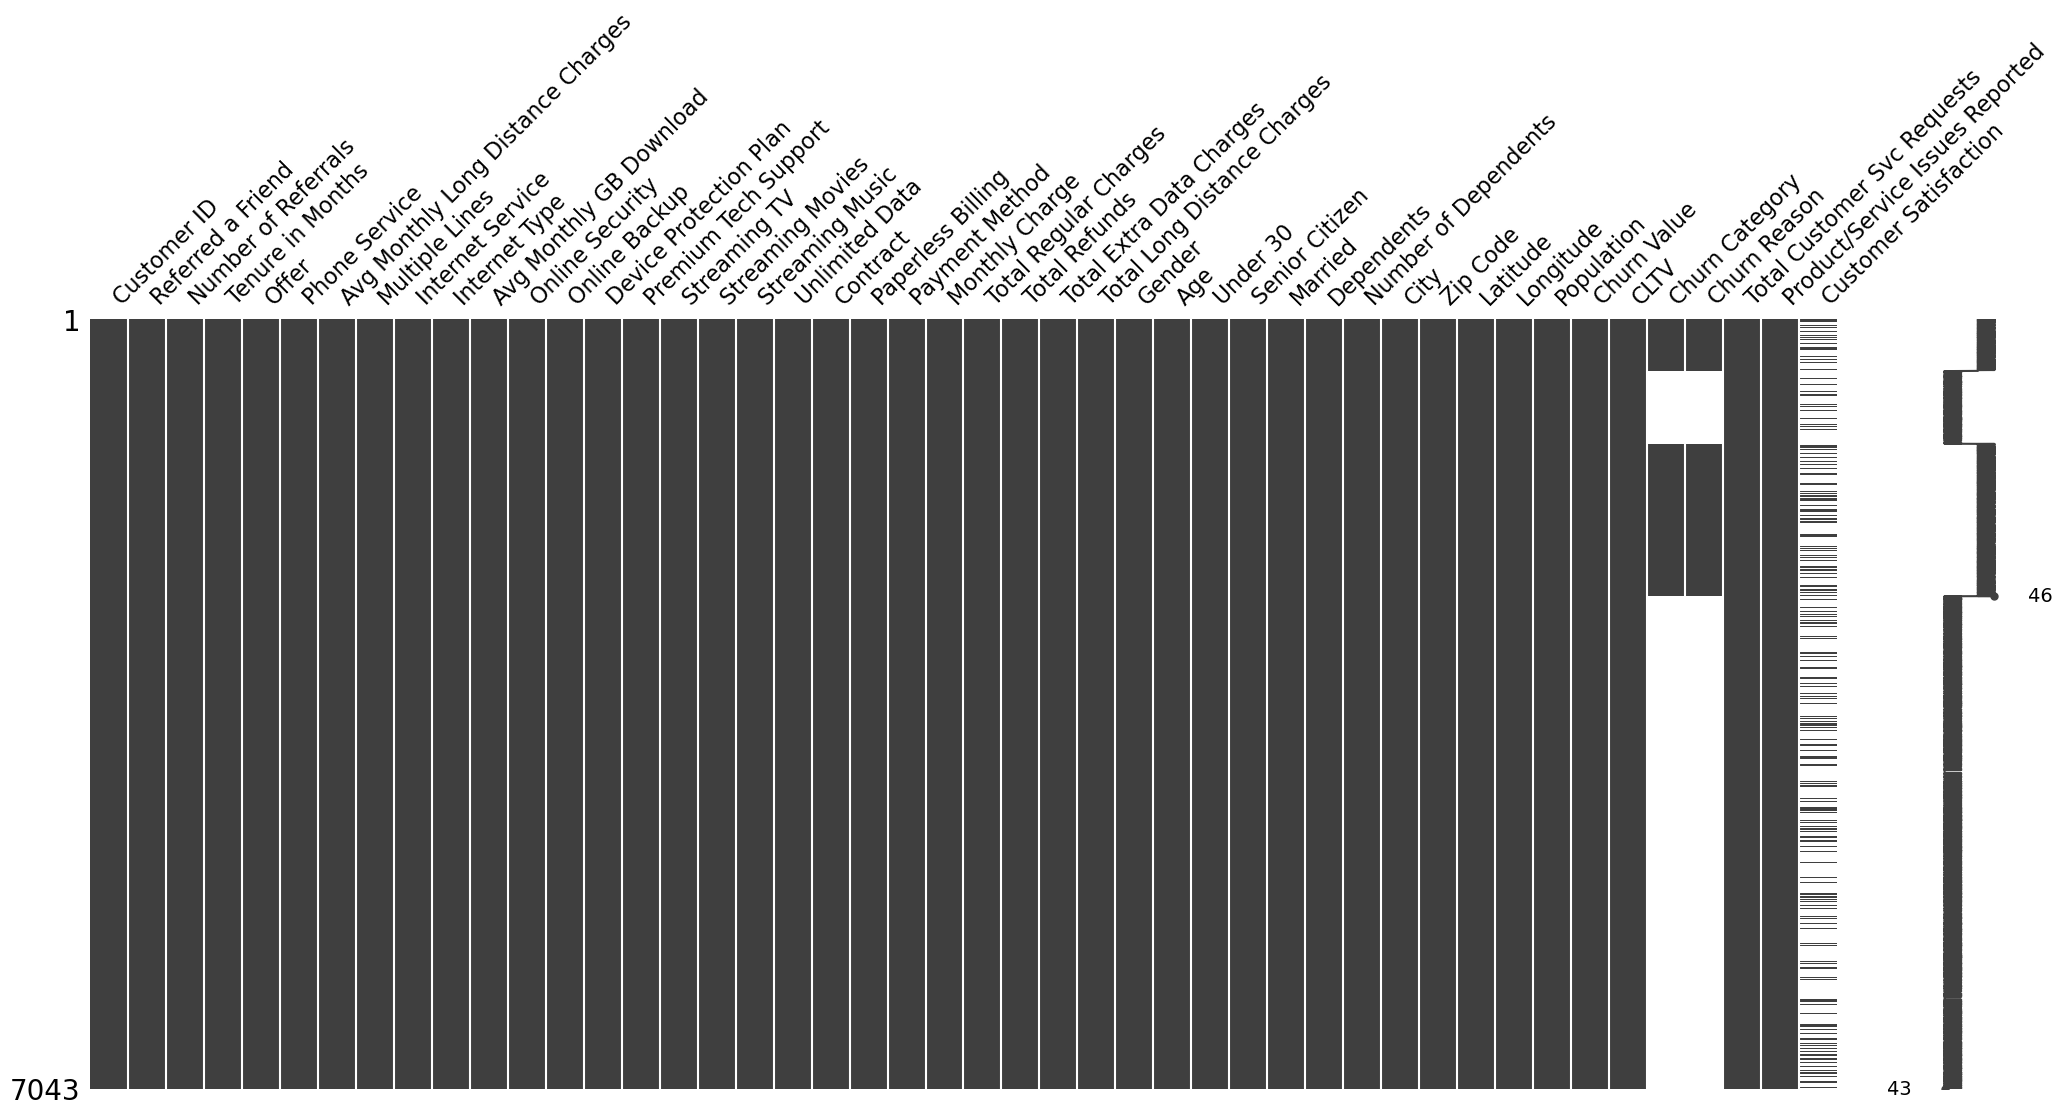

In [24]:
# Visualize missing values as a matrix
msno.matrix(df);

### 2.3.3 Data Cleansing<a id='2.3.3'></a>

In [25]:
#Count of null values per column
df.isnull().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

In [26]:
# Count of unique values per column
print(df.nunique())

Customer ID                          7043
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                        2
Internet Type                           4
Avg Monthly GB Download                63
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Paperless Billing                       2
Payment Method                          3
Monthly Charge                       2298
Total Regular Charges             

In [27]:
#we drop the customerID : each row has a unique value.
df.drop('Customer ID', axis=1, inplace=True)

## 2.4 Exploratory Data Analysis<a id='2.4'></a>

### 2.4.1 Visualizing probability distributions of numerical features<a id='2.4.1'></a>

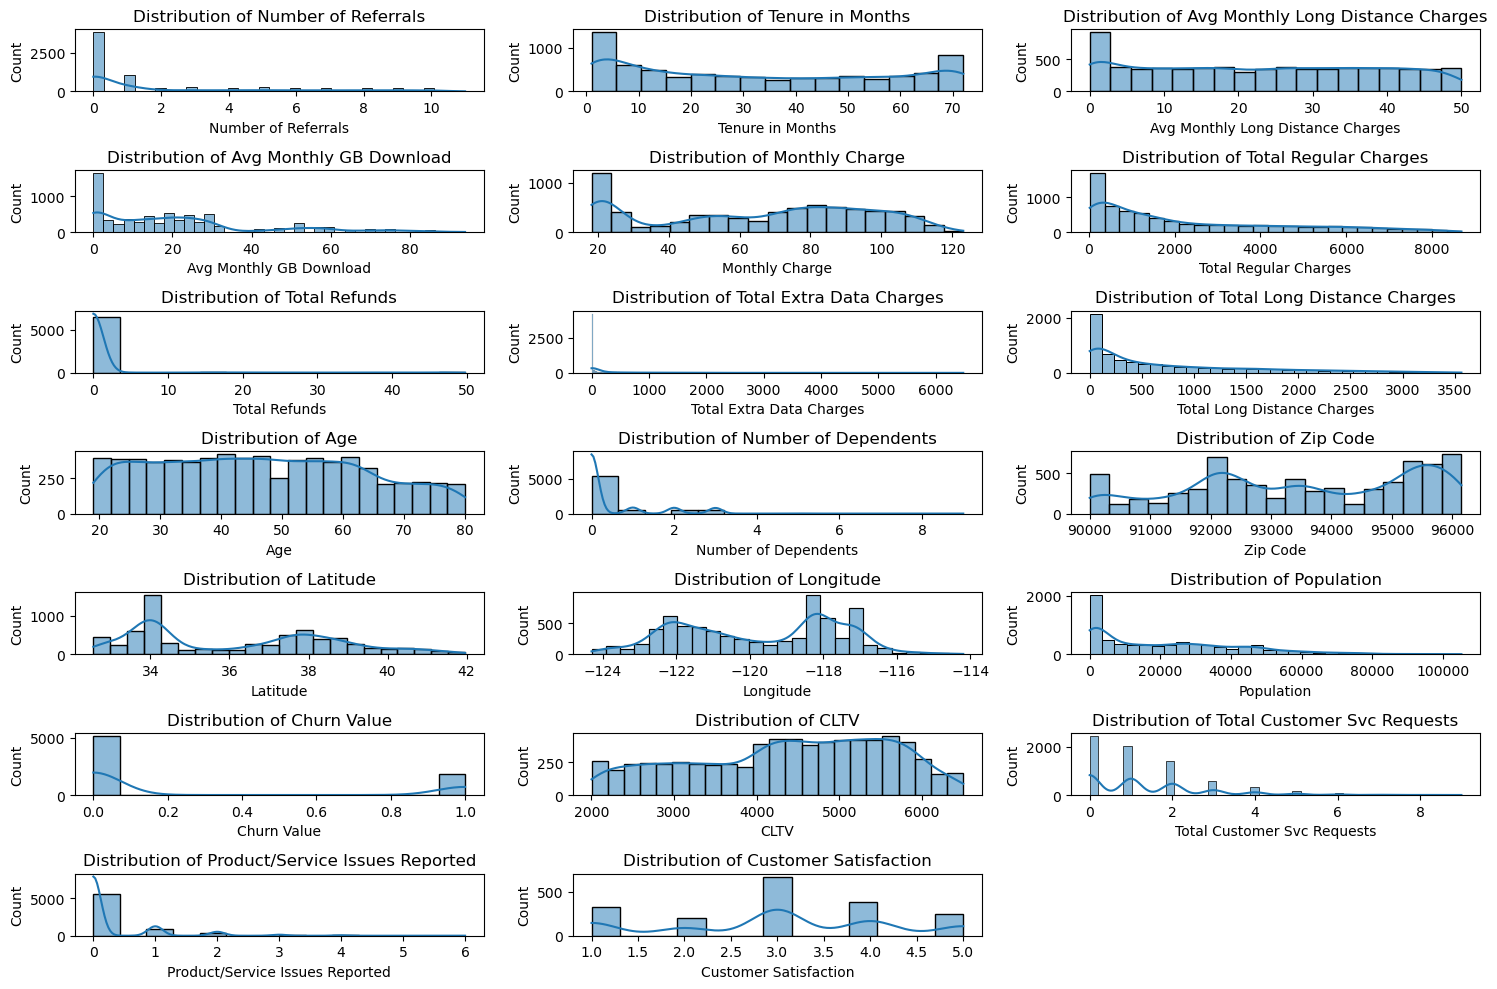

In [28]:
# Visualizing probability distributions of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_features)
num_rows = (num_cols - 1) // 3 + 1

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()



### 2.4.2 Summary Statistics<a id='2.4.2'></a>

In [29]:
#Summary Statistics:
# Display summary statistics for numerical features
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       Number of Referrals  Tenure in Months  \
count          7043.000000       7043.000000   
mean              1.951867         32.386767   
std               3.001199         24.542061   
min               0.000000          1.000000   
25%               0.000000          9.000000   
50%               0.000000         29.000000   
75%               3.000000         55.000000   
max              11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                21.110890   
std                            15.448113                20.948471   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                28.00000

### 2.4.3 Visualizing Distributions<a id='2.4.3'></a>

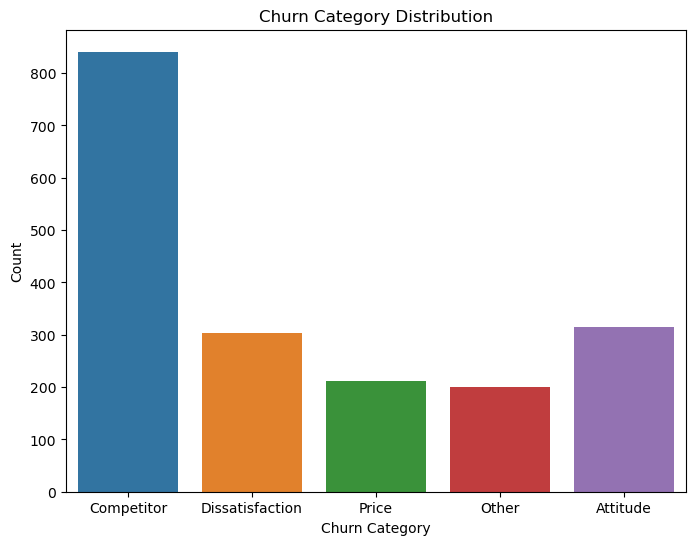

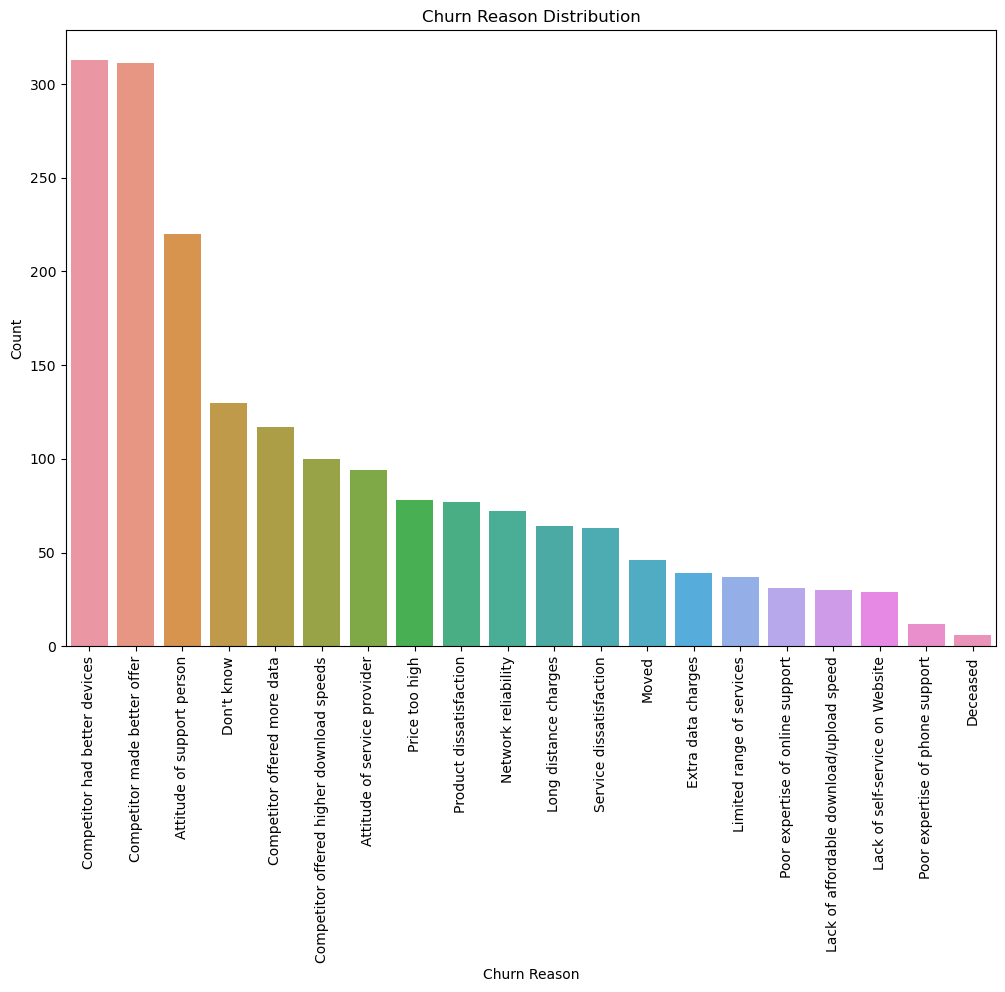

In [30]:
# Data Visualization:
# Visualize 'Churn Category' distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn Category', data=df)
plt.title('Churn Category Distribution')
plt.xlabel('Churn Category')
plt.ylabel('Count')
plt.show()

# Visualize 'Churn Reason' distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='Churn Reason', data=df, order=df['Churn Reason'].value_counts().index)
plt.title('Churn Reason Distribution')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## 2.5 Feature Selection based on Correlation<a id='2.5'></a>

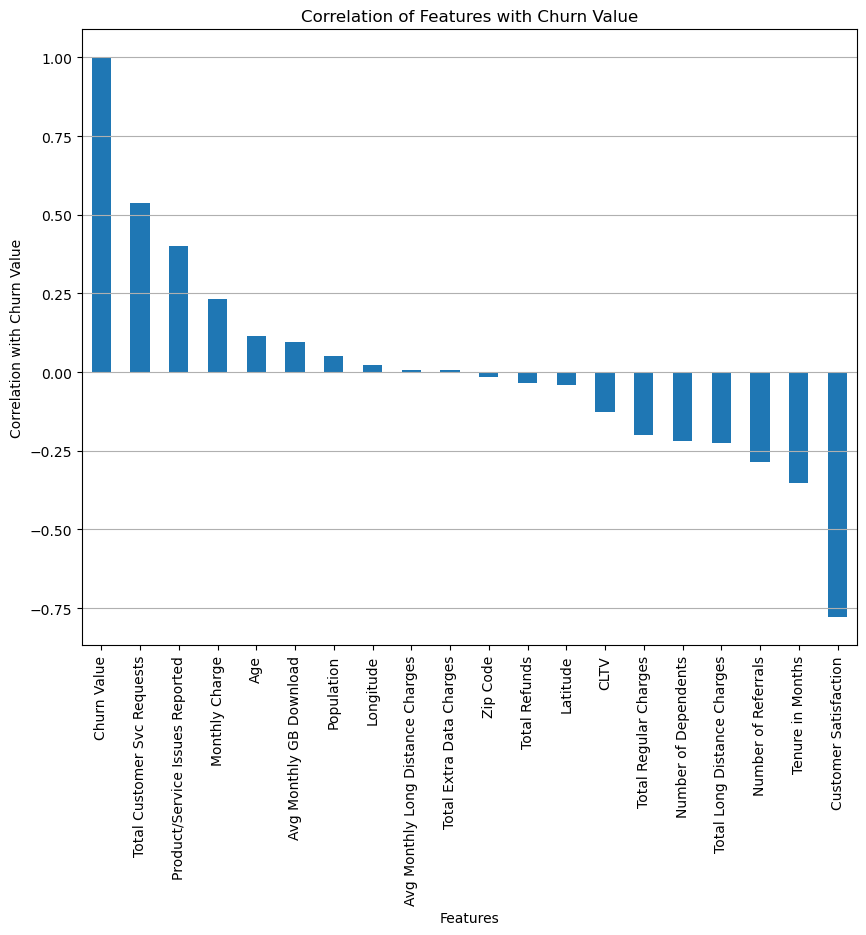

In [40]:
# Feature Selection based on Correlation:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Extract correlation values with target variable
target_correlation = correlation_matrix['Churn Value']

# Set a threshold for minimum correlation
correlation_threshold = 0.1

# Find columns with correlation below the threshold
low_correlation_columns = target_correlation[abs(target_correlation) < correlation_threshold].index

# Drop the columns with low correlation
X_selected = df.drop(columns=low_correlation_columns)

# Visualize the correlation coefficients with the target variable using a bar graph
plt.figure(figsize=(10, 8))
target_correlation.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Correlation with Churn Value')
plt.xlabel('Features')
plt.title('Correlation of Features with Churn Value')
plt.grid(axis='y')
plt.show()


In [34]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X_selected)